In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import jax
import impt
import jax.numpy as jnp
from fpfs import pltutil
import astropy.io.ascii as pyascii
import matplotlib.pylab as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
if False:
    def funA(a):
        return impt.fpfs.utils.tsfunc2(a, mu = 0.2, sigma= 0.2 )
    def funB(a):
        return impt.fpfs.utils.tsfunc2(a, mu = 0.2, sigma= 0.2 )*1./(0.4 + a)

    plt.close()
    x = jnp.linspace(-1., 1., 1000)
    y = impt.fpfs.utils.tsfunc2(x, mu = 0.2, sigma= 0.2 )
    plt.plot(x, y)
    z = y* 1./(0.4 + x)
    plt.plot(x, z)
    plt.xlim(0, 1.)
    plt.show()

In [8]:
if False:
    plt.close()
    funA2 =  jax.grad(funA)
    funB2 = jax.grad(funB)
    y2 = jax.vmap(funA2)(x)
    z2 = jax.vmap(funB2)(x)

    plt.plot(x, y2)
    plt.plot(x, z2)
    plt.xlim(0, 1.)
    plt.show()

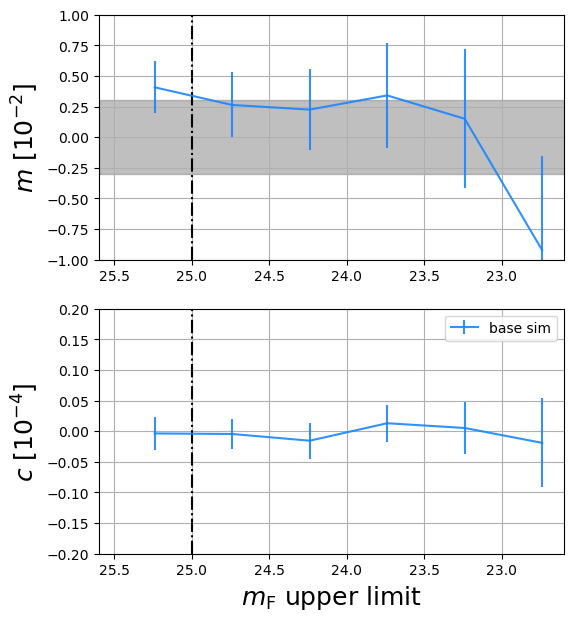

In [9]:
outs = pyascii.read('sum_basic/try1_bin_M00_sim_test0.csv')
x=outs['binave']
y1=outs['mbias']
yerr=outs['merr']
z1=outs['cbias']
zerr=outs['cerr']

# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)
ax=axes[0]
xlabel=r'$m_{\rm F}$ upper limit';
ax.errorbar(np.array(x)+0.04,np.array(y1)*1e2,np.array(yerr)*1e2,label='base sim',color=pltutil.colors[1])

ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)
ax.set_xlim(22.6,25.6)
ax.axvline(25.,color='black',ls='-.')
ax.set_ylim(-1,1.)

ax.invert_xaxis()
ax.axhspan(-0.3,0.3,0,100,color='gray',alpha=0.5)
ax.grid()


ax=axes[1]
ax.errorbar(np.array(x)+0.04,np.array(z1)*1e4,np.array(zerr)*1e4,label='base sim',color=pltutil.colors[1])
ax.legend()
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(22.6,25.6)
ax.axvline(25.,color='black',ls='-.')

ax.set_ylim(-0.2,0.2)
ax.set_xlabel(xlabel,fontsize=18)
ax.grid()
ax.invert_xaxis()
plt.show()